In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [20]:
csv = pd.read_csv("CIFAR+combine.csv")
# csv = csv.loc[(csv['mode'].isin(['manifold'])) ^ (csv['eta'] == 1)]
csv = csv.loc[~csv['mode'].str.contains('full')].loc[~csv['mode'].str.contains('one')].loc[~csv['mode'].str.contains('\*a-')]
csv


,Name,mode,scale,label,eta,validity,fid,sfid,is,precision,recall
0,guide_mode=classifier+scale=0.1+label=8,classifier,0.1,8,1,0.3652,91.932738,114.626943,7.021482,0.350586,0.570
1,guide_mode=classifier+scale=0.1+label=6,classifier,0.1,6,1,0.2471,90.925637,137.488113,6.851516,0.373047,0.574
2,guide_mode=dynamic-two-0.5*a*(1-a)+scale=20+la...,dynamic-two-0.5*a*(1-a),20.0,1,1,0.8208,39.476015,122.032979,3.341644,0.606445,0.517
3,guide_mode=dynamic-two-0.1*a*(1-a)+scale=20+la...,dynamic-two-0.1*a*(1-a),20.0,1,1,0.8135,40.359251,120.499850,3.390682,0.585938,0.474
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
...,...,...,...,...,...,...,...,...,...,...,...
410,guide_mode=manifold+scale=20+label=6,manifold,20.0,6,0,0.4658,128.547993,154.099395,5.139782,0.400879,0.502
411,guide_mode=manifold+scale=20+label=8,manifold,20.0,8,0,0.7637,53.479205,114.970846,3.942854,0.534180,0.399
412,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0,0.7295,99.500889,139.139870,3.925016,0.419922,0.276
413,guide_mode=manifold+scale=50+label=6,manifold,50.0,6,0,0.5049,142.991670,155.255786,5.140246,0.392090,0.431


In [7]:
csv.loc[csv['mode'] == 'manifold'].loc[csv['label'] == 1].sort_values('validity', ascending=False)[:20]

,Name,mode,scale,label,eta,validity,fid,sfid,is,precision,recall
8,guide_mode=manifold+scale=5+label=1,manifold,5.0,1,1,0.8374,43.015129,120.601504,3.541133,0.593750,0.453
56,guide_mode=manifold+scale=20+label=1,manifold,20.0,1,1,0.8164,61.726525,127.401138,3.763835,0.516113,0.423
226,guide_mode=manifold+scale=5+label=1,manifold,5.0,1,0,0.7964,72.999255,139.026885,3.571803,0.489746,0.354
5,guide_mode=manifold+scale=2+label=1,manifold,2.0,1,1,0.7583,41.127577,117.742019,3.625943,0.551270,0.517
228,guide_mode=manifold+scale=20+label=1,manifold,20.0,1,0,0.7539,101.861329,147.203607,3.658512,0.397949,0.303
110,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,1,0.7456,78.389110,125.010881,4.274128,0.431152,0.379
229,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0,0.7295,99.500889,139.139870,3.925016,0.419922,0.276
230,guide_mode=manifold+scale=2+label=1,manifold,2.0,1,0,0.6929,52.662739,126.936566,3.662592,0.521484,0.495
15,guide_mode=manifold+scale=1+label=1,manifold,1.0,1,1,0.6523,48.452983,118.477048,4.190792,0.482422,0.559
233,guide_mode=manifold+scale=1+label=1,manifold,1.0,1,0,0.5698,56.208137,125.852261,4.239143,0.455078,0.599


In [10]:
avg = csv.groupby(['mode', 'scale', 'eta']).mean(['validity', 'fid', 'sfid', 'is', 'precision', 'recall']).reset_index()
avg

,mode,scale,eta,label,validity,fid,sfid,is,precision,recall
0,classifier,0.10,1,5.00,0.288900,91.391462,126.834146,6.831919,0.329753,0.590333
1,classifier,0.25,1,5.00,0.589367,53.712146,119.912705,4.824308,0.491374,0.526333
2,classifier,0.50,1,5.00,0.790700,39.151420,123.533796,3.603296,0.630697,0.477667
3,classifier,1.00,1,5.00,0.902500,39.480449,134.853183,2.883460,0.733236,0.383667
4,classifier,2.00,1,5.00,0.951333,48.992927,153.782200,2.580580,0.774740,0.297000
5,dynamic-fonly,2.00,1,5.00,0.405400,80.611715,124.057826,5.809196,0.376302,0.595667
6,dynamic-fonly,5.00,1,5.00,0.585433,59.196403,120.376606,4.891800,0.462891,0.558667
7,dynamic-fonly,20.00,1,5.00,0.776667,48.033505,121.883559,3.971615,0.575846,0.475667
8,dynamic-fonly,50.00,1,5.00,0.763033,61.727397,126.010501,4.271632,0.537435,0.432000
9,dynamic-fonly,100.00,1,5.00,0.715633,78.726830,129.193249,4.724464,0.463704,0.441000


/tmp/user/23218/ipykernel_3918108/1232312817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eta-scale'] = data['eta'].astype(str) + '-' + data['scale'].astype(str)


<Axes: xlabel='fid', ylabel='validity'>

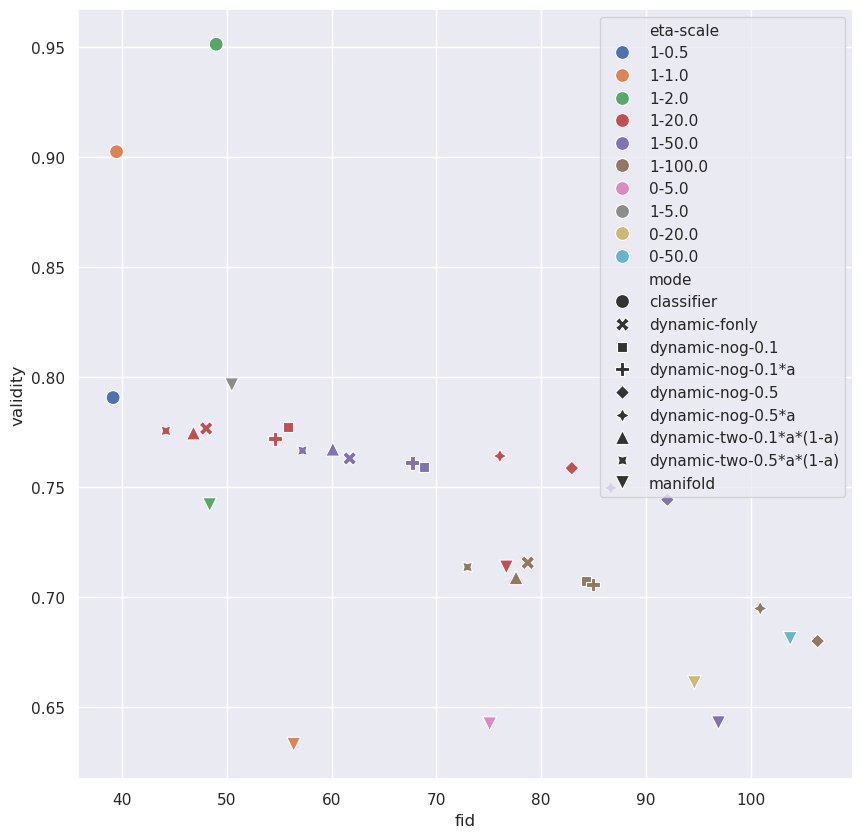

In [17]:
# data = avg.loc[avg['mode'] == 'manifold']
data = avg
data = data.loc[data['validity'] > 0.6]
# data = data.loc[data['fid']<70]
data['eta-scale'] = data['eta'].astype(str) + '-' + data['scale'].astype(str)

# data['scale'] = data['scale'].map(lambda x: str(x))
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(data=data, x='fid', y='validity', hue='eta-scale', style='mode', s=100)

In [16]:
csv.loc[csv['mode'].isin(['manifold', 'dynamic-fonly'])].loc[csv['label'] == 1].sort_values(by=['mode', 'scale'])

,Name,mode,scale,label,validity,fid,sfid,is,precision,recall
102,guide_mode=dynamic-fonly+scale=2+label=1,dynamic-fonly,2.0,1,0.3813,77.318172,124.520638,5.586083,0.329590,0.615
25,guide_mode=dynamic-fonly+scale=5+label=1,dynamic-fonly,5.0,1,0.5913,51.794021,118.781807,4.395249,0.461426,0.558
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
28,guide_mode=dynamic-fonly+scale=50+label=1,dynamic-fonly,50.0,1,0.8403,53.079123,126.083413,3.457582,0.559082,0.384
65,guide_mode=dynamic-fonly+scale=100+label=1,dynamic-fonly,100.0,1,0.8120,64.265418,126.881540,3.983398,0.479492,0.442
15,guide_mode=manifold+scale=1+label=1,manifold,1.0,1,0.6523,48.452983,118.477048,4.190792,0.482422,0.559
5,guide_mode=manifold+scale=2+label=1,manifold,2.0,1,0.7583,41.127577,117.742019,3.625943,0.551270,0.517
8,guide_mode=manifold+scale=5+label=1,manifold,5.0,1,0.8374,43.015129,120.601504,3.541133,0.593750,0.453
56,guide_mode=manifold+scale=20+label=1,manifold,20.0,1,0.8164,61.726525,127.401138,3.763835,0.516113,0.423
110,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0.7456,78.389110,125.010881,4.274128,0.431152,0.379


In [21]:
csv = pd.read_csv("CIFAR+combine(part).csv")
# csv = csv.loc[(csv['mode'].isin(['manifold'])) ^ (csv['eta'] == 1)]
csv = csv.loc[~csv['mode'].str.contains('full')].loc[~csv['mode'].str.contains('one')].loc[~csv['mode'].str.contains('\*a-')]
csv


,Name,mode,scale,label,eta,validity,fid,sfid,is,precision,recall
0,guide_mode=classifier+scale=0.1+label=8,classifier,0.1,8,1,0.3652,91.932738,114.626943,7.021482,0.350586,0.570
1,guide_mode=classifier+scale=0.1+label=6,classifier,0.1,6,1,0.2471,90.925637,137.488113,6.851516,0.373047,0.574
2,guide_mode=dynamic-two-0.5*a*(1-a)+scale=20+la...,dynamic-two-0.5*a*(1-a),20.0,1,1,0.8208,39.476015,122.032979,3.341644,0.606445,0.517
3,guide_mode=dynamic-two-0.1*a*(1-a)+scale=20+la...,dynamic-two-0.1*a*(1-a),20.0,1,1,0.8135,40.359251,120.499850,3.390682,0.585938,0.474
4,guide_mode=dynamic-fonly+scale=20+label=1,dynamic-fonly,20.0,1,1,0.8174,41.016895,120.525200,3.403000,0.583984,0.443
...,...,...,...,...,...,...,...,...,...,...,...
410,guide_mode=manifold+scale=20+label=6,manifold,20.0,6,0,0.4658,128.547993,154.099395,5.139782,0.400879,0.502
411,guide_mode=manifold+scale=20+label=8,manifold,20.0,8,0,0.7637,53.479205,114.970846,3.942854,0.534180,0.399
412,guide_mode=manifold+scale=50+label=1,manifold,50.0,1,0,0.7295,99.500889,139.139870,3.925016,0.419922,0.276
413,guide_mode=manifold+scale=50+label=6,manifold,50.0,6,0,0.5049,142.991670,155.255786,5.140246,0.392090,0.431


In [31]:
# concert avg into a half table such that all eta = 0 and eta = 1 are concated in the same rows some long as the mode, scale are the same
avg = csv.pivot_table(index=['mode', 'scale', 'label'], columns='eta', values=['validity', 'fid', 'sfid', 'is', 'precision', 'recall'])
avg = avg.reset_index()
avg.columns = ["_".join([str(t) for t in w if t!='']) for w in avg.columns.values]
avg

,mode,scale,label,fid_0,fid_1,is_0,is_1,precision_0,precision_1,recall_0,recall_1,sfid_0,sfid_1,validity_0,validity_1
0,classifier,0.10,1,73.036794,91.316010,5.598959,6.622758,0.368164,0.265625,0.644,0.627,127.635854,128.387383,0.3765,0.2544
1,classifier,0.10,6,71.618125,90.925637,6.340681,6.851516,0.438965,0.373047,0.647,0.574,134.625245,137.488113,0.3550,0.2471
2,classifier,0.10,8,65.884177,91.932738,5.978353,7.021482,0.419434,0.350586,0.568,0.570,115.120386,114.626943,0.4980,0.3652
3,classifier,0.25,1,39.747365,50.804675,3.821718,4.372647,0.555176,0.458496,0.538,0.554,117.630030,116.152275,0.6982,0.5557
4,classifier,0.25,6,43.096277,60.222134,4.288852,5.336592,0.612305,0.483398,0.589,0.553,131.381522,130.325553,0.6582,0.4985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,manifold,20.00,6,128.547993,97.721244,5.139782,5.618134,0.400879,0.461426,0.502,0.460,154.099395,142.901684,0.4658,0.5610
131,manifold,20.00,8,53.479205,70.601545,3.942854,4.599549,0.534180,0.482422,0.399,0.403,114.970846,115.153924,0.7637,0.7637
132,manifold,50.00,1,99.500889,78.389110,3.925016,4.274128,0.419922,0.431152,0.276,0.379,139.139870,125.010881,0.7295,0.7456
133,manifold,50.00,6,142.991670,124.127553,5.140246,5.672109,0.392090,0.395020,0.431,0.400,155.255786,149.017778,0.5049,0.4976


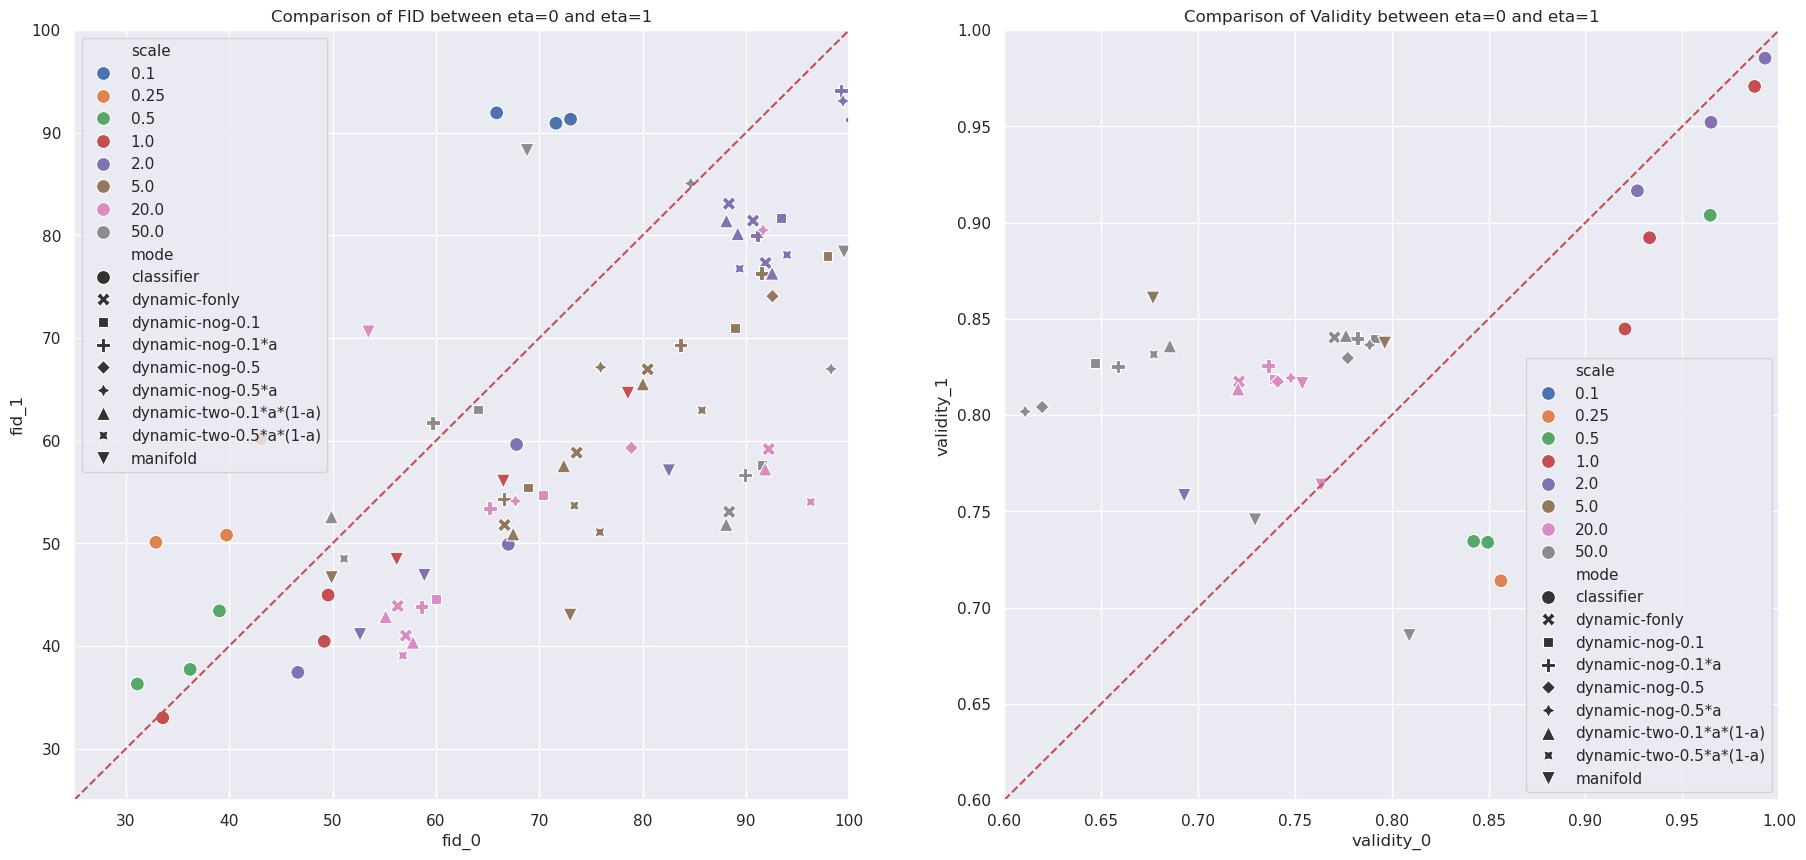

In [42]:
data = avg.loc[~avg.isna().any(axis=1)]
data = data.loc[data['scale'] < 100]
data['scale'] = data['scale'].map(lambda x: str(x))

fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(22, 10), dpi=100)

sns.scatterplot(data=data, x='fid_0', y='fid_1', hue='scale', style='mode', s=100, ax=axs[0])
axs[0].set_title("Comparison of FID between eta=0 and eta=1")
axs[0].legend(loc='upper left')
l, r = 25, 100
axs[0].set_xlim(l,r)
axs[0].set_ylim(l,r)
axs[0].plot([l,r], [l,r], 'r--')

sns.scatterplot(data=data, x='validity_0', y='validity_1', hue='scale', style='mode', s=100, ax=axs[1])
axs[1].set_title("Comparison of Validity between eta=0 and eta=1")
axs[1].legend(loc='lower right')
l, r = 0.6, 1
axs[1].set_xlim(l, r)
axs[1].set_ylim(l, r)
axs[1].plot([l,r], [l,r], 'r--')